# Fast Upsampling in a Single Forward Pass with FeatUp (JBU)

> ⚠️ Change your collab runtime to T4 GPU before running this notebook

In this notebook we will walk through how to load and work with our catalog of pre-trained upsamplers that work with common vision backbones such as CLIP, DINO, DINO v2, and ResNet50. We note that we add a Layer Norm operation to each of these backbones prior to upsampling so keep this in mind if you are trying to replace an existing component with one of our upsampled variants. This is controlled by the `use_norm=True` flag.

In [ ]:
!git clone https://github.com/mhamilton723/FeatUp

## Install FeatUp and our fast Joint Bilateral Upsampling (JBU) Kernel

> ⚠️ This cell will take 3-5 minutes to run because of cuda kernel compilation


In [ ]:
import os
os.chdir("FeatUp/")

In [ ]:
!pip install -e .
!pip install git+https://github.com/mhamilton723/CLIP.git

In [1]:
import torch
import torchvision.transforms as T
from PIL import Image

from featup.util import norm, unnorm
from featup.plotting import plot_feats

In [2]:
input_size = 224
image_path = "sample-images/plant.png"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_norm = True

transform = T.Compose([
    T.Resize(input_size),
    T.CenterCrop((input_size, input_size)),
    T.ToTensor(),
    norm
])

image_tensor = transform(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

## DINO

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /home/marhamil/.cache/torch/hub/facebookresearch_dino_main
/anaconda/envs/pytorch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Global seed set to 0


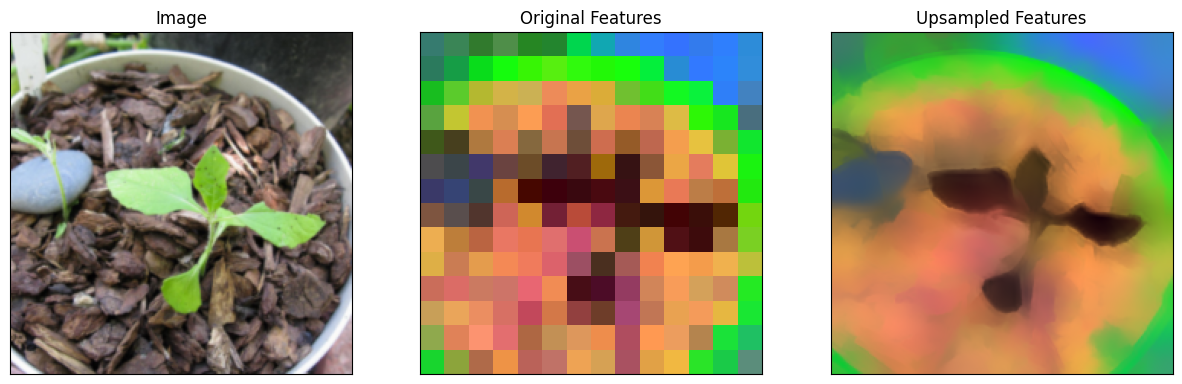

In [3]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dino16', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])


## DINO v2

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
/datadrive/phd-projects/FeatUpContainer/FeatUp/featup/featurizers/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/datadrive/phd-projects/FeatUpContainer/FeatUp/featup/featurizers/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/datadrive/phd-projects/FeatUpContainer/FeatUp/featup/featurizers/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
Using cache found in /home/marhamil/.cache/torch/hub/facebookresearch_dinov2_main
/home/marhamil/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/marhamil/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/atte

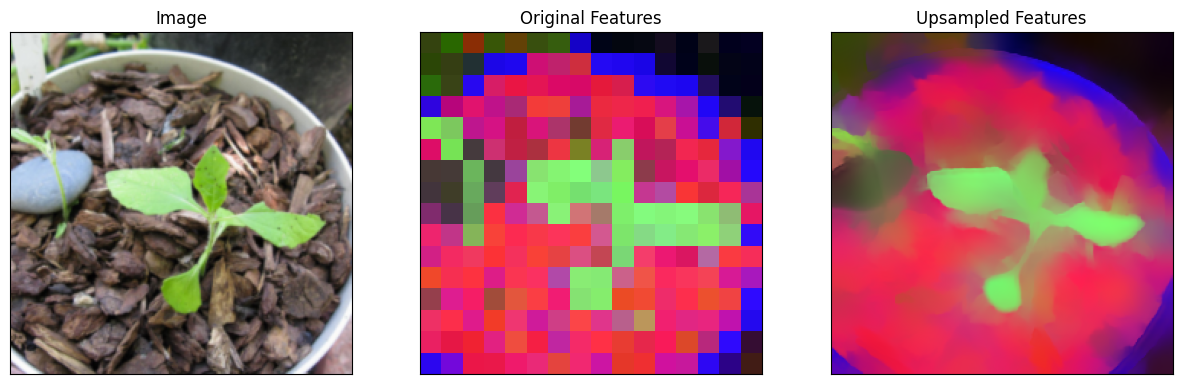

In [4]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dinov2', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

## CLIP

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


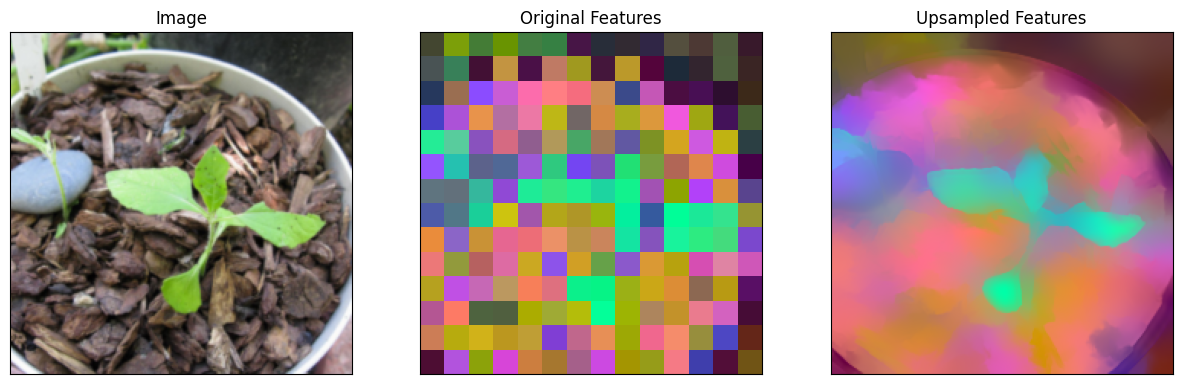

In [5]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'clip', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

# MaskCLIP
## Note: Use this version of CLIP for text alignment

/anaconda/envs/pytorch/lib/python3.10/site-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mhamilton723/FeatUp/zipball/main" to /home/marhamil/.cache/torch/hub/main.zip
Downloading: "https://marhamilresearch4.blob.core.windows.net/feature-upsampling-public/pretrained/no_norm/maskclip_jbu_stack_cocostuff.ckpt" to /home/marhamil/.cache/torch/hub/checkpoints/maskclip_jbu_stack_cocostuff.ckpt
100%|███

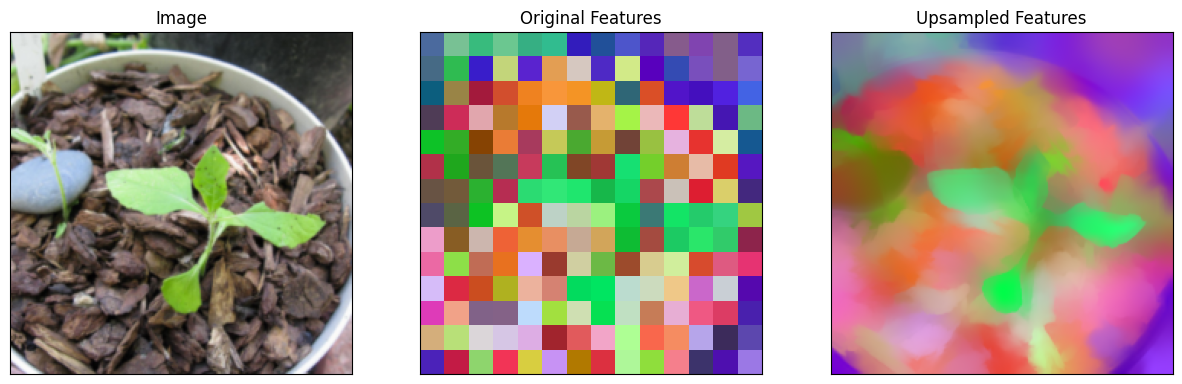

In [7]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'maskclip', use_norm=False).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

# ViT

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


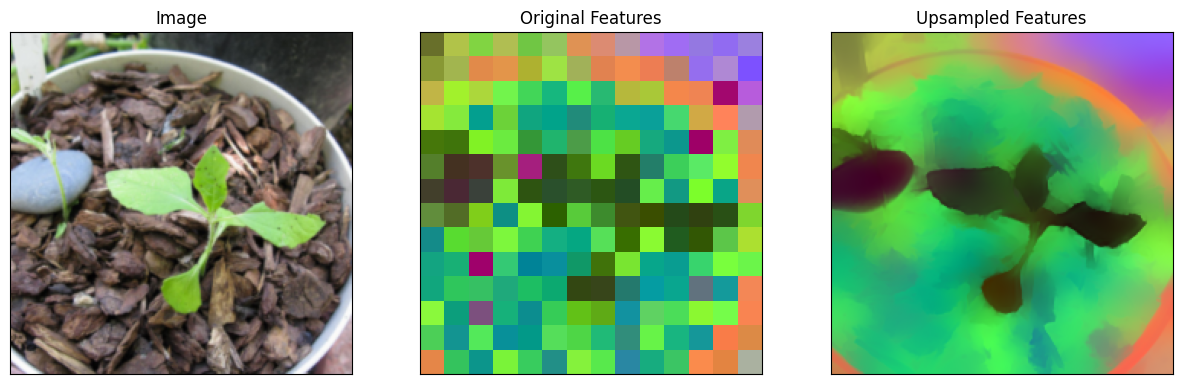

In [ ]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'vit', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

# ResNet 50

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


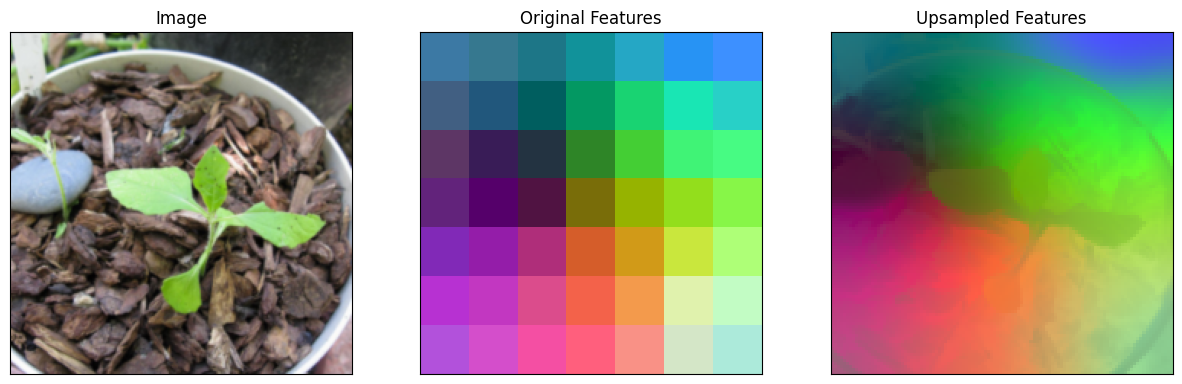

In [ ]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'resnet50', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Global seed set to 0


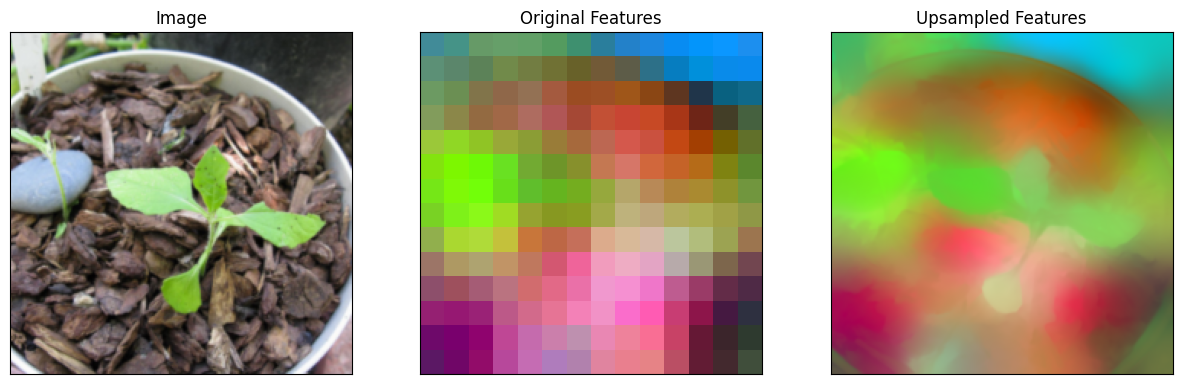

In [ ]:
import torch.nn.functional as F

big_img = F.interpolate(image_tensor, scale_factor=2, mode='bilinear')
hr_feats = upsampler(big_img)
lr_feats = upsampler.model(big_img)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])